<a href="https://colab.research.google.com/github/dangoldmann/TP-Netflix/blob/main/TP_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo Práctico Netflix**
### *Septiembre 2022*

Descargar el archivo que contiene el historial de Netflix. Pueden descargar el suyo propio entrando a este link. A resolver de a grupos de 2 o 3 integrantes.

Ignorar los siguientes dispositivos: 'Sony PS4', 'Netflix Windows App - Cadmium Windows Mobile', 'Apple iPhone 6s', 'Apple iPhone 7 Plus (CDMA)', 'Chrome PC (Cadmium)', 'Samsung 2015 NT14M DTV Smart TV', 'iPhone 5S GSM', 'Google Chromecast V3 Streaming Stick'.

- Contabilizar el dispositivo con el que más títulos se reprodujeron.
- Encontrar la película con más ocurrencias y la película con mayor duración total.
- Generar un TOP “N” de series vistas y graficar.
 - Por tiempo visto
 - Por ocurrencias
- Visualizar una semana de reproducciones genérica, en función a las reproducciones por día y por horario de todos los años.
Contabilizar la cantidad de títulos vistos por año, graficar su variación a través de los años.
Total de días de todos los títulos reproducidos.

### **Bonus**

- Identificar cuál fue la película de Star Wars más veces vista por duración.
- Utilizando la API de IMDb (u otra):
 - Mostrar el póster de las películas más vistas, y de las series.
 - Encontrar el género de series y el de películas más ocurrente.
- Encontrar la serie que más rápido se terminó de ver.


Formato de entrega: Link a GitHub conteniendo el Ipython Notebook con su output guardado. No se corrigen Notebooks sin output generado ni entregas que no sean links a GitHub directamente. Se va a evaluar formato del Notebook, celdas de texto, prolijidad del código y de los resultados generados.




#### Importando librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from importlib import reload
from datetime import datetime as dt
import seaborn as sns

#### Guardando el dataframe

In [ ]:
df = pd.read_csv("NetflixHistory.csv")

#### Eliminando filas no deseadas

Eliminando las visualizaciones de los dispositivos no deseados

In [ ]:
dispositivos_ignorados = ["Sony PS4", "Netflix Windows App - Cadmium Windows Mobile", "Apple iPhone 6s", "Apple iPhone 7 Plus (CDMA)", "Chrome PC (Cadmium)", "Samsung 2015 NT14M DTV Smart TV", "iPhone 5S GSM", "Google Chromecast V3 Streaming Stick"]

df = df[~df["Device Type"].isin(dispositivos_ignorados)]

Eliminando los hooks, trailers y recaps

In [ ]:
video_types = df.groupby(["Supplemental Video Type"]).size()
video_types

Supplemental Video Type
HOOK              49
RECAP              4
TEASER_TRAILER     3
TRAILER           34
dtype: int64

In [ ]:
video_types_ignorados = ["HOOK", "RECAP", "TEASER_TRAILER", "TRAILER"]

df = df[~df["Supplemental Video Type"].isin(video_types_ignorados)]

Eliminando columnas no utilizadas

In [ ]:
columnas_ignoradas = ["Supplemental Video Type", "Attributes", "Country", "Profile Name"]

for i in columnas_ignoradas:
  df = df.drop(columns = i)

#### Modificando las columnas

Crear una nueva columna que contenga si la visualización corresponde a una película o una serie

In [ ]:
def defineContentType(input):
  if input.count(':') > 1:
    return "Serie"
  else:
    return "Pelicula"

df["Content Type"] = df["Title"].apply(defineContentType)

Cambiando los valores de las duraciones a segundos

In [ ]:
def changeDurationToSec(input):
    if(type(input) == str):
      horas, minutos, segundos = input.split(':')
      return int(horas) * 60 * 60 + int(minutos) * 60 + int(segundos)
    return input

df["Duration"] = df["Duration"].apply(changeDurationToSec)

Agregando una columna con el título simplificado

In [ ]:
def simplifyTitle(input):
  return input.split(':')[0]

df["Simple Title"] = df["Title"].apply(simplifyTitle)

#### Contabilizar el dispositivo con el que más títulos se reprodujeron

In [ ]:
dispositivos = df.groupby(["Device Type"]).size()
max_cant = max(dispositivos)
dispositivos = dispositivos.reset_index()

In [ ]:
dispositivo_mas_utilizado = dispositivos.loc[dispositivos[0]==max_cant]
dispositivo_mas_utilizado

,Device Type,0
1,Apple Apple TV 4 Apple TV,3439


#### Encontrar la película con más ocurrencias y la película con mayor duración total

In [ ]:
df_peliculas = df[df["Content Type"] == "Pelicula"]

Mayor ocurrencias

In [ ]:
peliculas = df_peliculas.groupby(["Title"]).size().reset_index()
peliculas = peliculas.rename(columns={0:"Occurrences"})
max_pelicula = max(peliculas["Occurrences"])
peli_mas_ocurrida = peliculas.loc[peliculas["Occurrences"]==max_pelicula]
peli_mas_ocurrida

,Title,Occurrences
42,El código enigma,7
128,Star Wars: El Imperio contraataca,7


Mayor duración

In [ ]:
durations = df_peliculas.groupby(['Title', 'Duration']).size().reset_index()
durations = durations.drop(columns=0)
max_duration = max(durations["Duration"])
peli_mas_duracion = durations.loc[durations["Duration"] == max_duration]
peli_mas_duracion

,Title,Duration
63,El club de la pelea,8411


#### Generar un TOP “N” de series vistas y graficar

Guardando las series en un dataframe

In [ ]:
df_series = df[df["Content Type"] == "Serie"]

##### Por tiempo visto

Guardando en un dataframe los titulos y las horas de reproduccion correspondientes

In [ ]:
series_durations = df_series.groupby("Simple Title")[["Duration"]].sum()
series_durations = series_durations.sort_values(by="Duration", ascending = False).reset_index()

Creando un diccionario que contiene como keys el titulo de la series y como valor sus horas de reproducción correspondientes

In [ ]:
peli_duracion = {}

cantidad_top_tiempo = int(input("De cuantas series desea hacer el top: "))
i = 0
while i < cantidad_top_tiempo:
  title = series_durations["Simple Title"][i]
  duration = int(series_durations["Duration"][i] / 3600)
  peli_duracion[title] = duration
  i += 1

De cuantas series desea hacer el top: 7


Creando el grafico basado en el diccionario

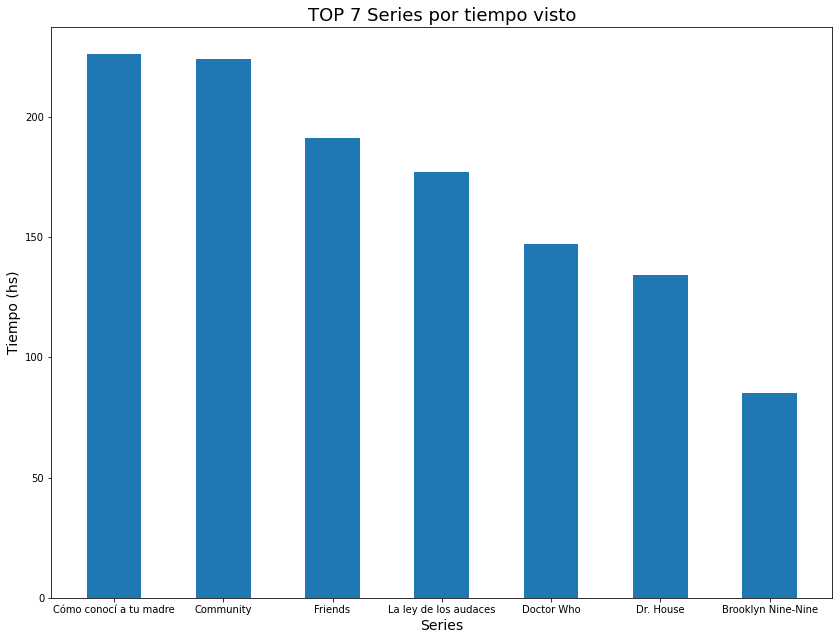

In [ ]:
fig = plt.figure(figsize = (cantidad_top_tiempo * 2, cantidad_top_tiempo * 1.5))
plt.bar(peli_duracion.keys(), peli_duracion.values(), width = 0.5)

plt.xlabel('Series', fontSize=14)
plt.ylabel('Tiempo (hs)', fontSize=14)

plt.title("TOP " + str(cantidad_top_tiempo) + " Series por tiempo visto", fontSize = 18)
plt.show()

##### Por ocurrencias

Guardando en un dataframe los titulos y las ocurrencias de cada serie

In [ ]:
series_occurrences = df_series.groupby(["Simple Title"]).size().reset_index()
series_occurrences = series_occurrences.rename(columns = {0:"Occurrences"})
series_occurrences = series_occurrences.sort_values(by = "Occurrences", ascending = False).reset_index()

Creando un diccionario que contiene como keys los titulos de las peliculas y como valores su numero de ocurrencias correspondiente

In [ ]:
peli_ocurrencia = {}

cantidad_top_ocurrencias = int(input("De cuantas series desea hacer el top: "))
i = 0
while i < cantidad_top_ocurrencias:
  title = series_occurrences["Simple Title"][i]
  occurrences = series_occurrences["Occurrences"][i]
  peli_ocurrencia[title] = occurrences
  i += 1
print(peli_ocurrencia)

De cuantas series desea hacer el top: 7
{'Community': 870, 'Cómo conocí a tu madre': 780, 'Friends': 604, 'Dr. House': 346, 'La ley de los audaces': 330, 'Brooklyn Nine-Nine': 314, 'Doctor Who': 279}


Creando un grafico basado en el diccionario

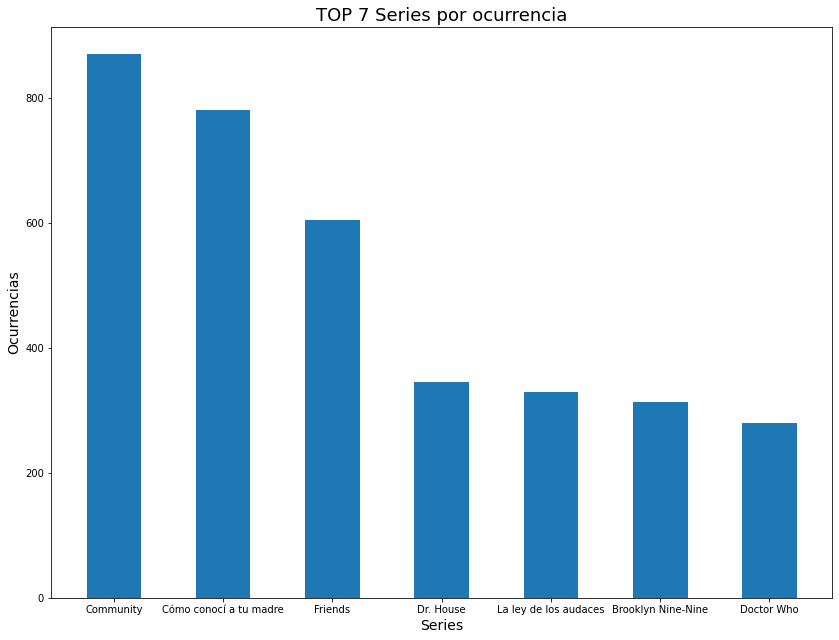

In [ ]:
fig = plt.figure(figsize = (cantidad_top_ocurrencias * 2, cantidad_top_ocurrencias * 1.5))
plt.bar(peli_ocurrencia.keys(), peli_ocurrencia.values(), width = 0.5)

plt.xlabel('Series', fontSize=14)
plt.ylabel('Ocurrencias', fontSize=14)

plt.title("TOP " + str(cantidad_top_ocurrencias) + " Series por ocurrencia", fontSize = 18)
plt.show()

#### Visualizar una semana de reproducciones genérica, en función a las reproducciones por día y por horario de todos los años.

Creando las funciones que reciben una fecha y devuelven o el año o el mes o el día o la hora

In [ ]:
def getDateTime(input):
  date = dt.strptime(input, '%Y-%m-%d %H:%M:%S')
  date = (date.strftime("%Y-%B-%A-%d %H:%M:%S"))
  res = ""

  for a in date:
    if a == "-" or a == " " or a == ":":
      res += "."
    else: 
      res += a

  return res.split(".")

def defineYearColumn(input):
  res = getDateTime(input)
  return res[0]

def defineMonthColumn(input):
  res = getDateTime(input)
  return res[1]

def defineDayColumn(input):
  res = getDateTime(input)
  return res[2]

def defineHourColumn(input):
  res = getDateTime(input)
  return res[4]

Creando las columnas que contengan el valor de la fecha de forma separada

In [ ]:
df["Year"] = df["Start Time"].apply(defineYearColumn)
df["Month"] = df["Start Time"].apply(defineMonthColumn)
df["Day"] = df["Start Time"].apply(defineDayColumn)
df["Hour"] = df["Start Time"].apply(defineHourColumn)

Creando un dataframe en el que tendra como columnas los días de la semana y como filas los rangos horarios

In [ ]:
df_graf = pd.DataFrame({}, columns=["Hour", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
df_graf["Hour"] = ["00", "04", "08", "12", "16", "20"]
df_graf = df_graf.set_index(["Hour"])

Obteniendo la cantidad de reproducciones por día y por rango horario y guardando el dato en el dataframe

In [ ]:
rango_horario = {
    "00":"03",
    "04":"07",
    "08":"11",
    "12":"15",
    "16":"19",
    "20":"23"
}

dias = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

for dia in dias:
  data = df.groupby(["Title", "Day", "Hour"]).size().reset_index()
  data = data[data["Day"] == dia]
  
  prom_dia = []
  
  for h in rango_horario:
    filtered_data = data[data["Hour"].between(h, rango_horario[h])]
    prom_dia.append(len(filtered_data))

  df_graf[dia] = prom_dia
print(df_graf)

      Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
Hour                                                                
00       301      323        259       313     262       315     249
04        60       73         44        44      69        75      91
08         1        2          2         0       4         0       2
12        38       40         37        56      62       112      46
16       166      156        146       210     197       179     197
20       211      183        162       232     225       204     214


Creando el grafico a partir del dataframe

In [ ]:
df_graf.style.background_gradient(cmap='Blues')

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Hour,,,,,,,
00,301,323,259,313,262,315,249
04,60,73,44,44,69,75,91
08,1,2,2,0,4,0,2
12,38,40,37,56,62,112,46
16,166,156,146,210,197,179,197
20,211,183,162,232,225,204,214


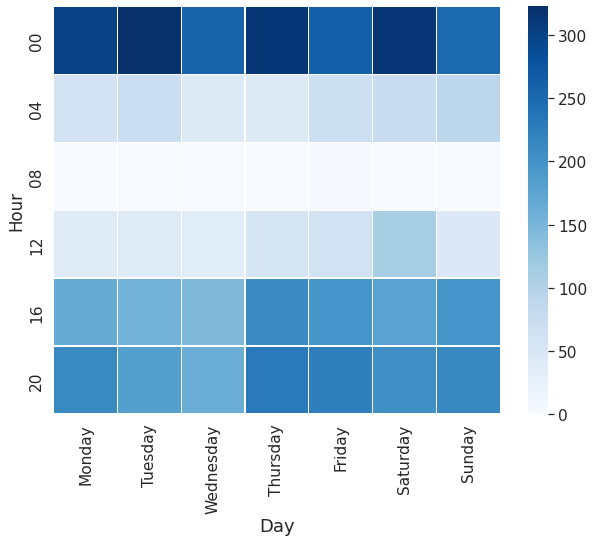

In [ ]:
fig = plt.figure(figsize = (10, 7.5))
sns.set(font_scale=1.4)
s = sns.heatmap(df_graf, cmap = "Blues", linewidths=0.1)
s.set_xlabel("Day", fontSize = 18)
s

#### Contabilizar la cantidad de títulos vistos por año, graficar su variación a través de los años.

Guardando en un diccionario como keys los años y como valores la cantidad de titulos correspondiente. Con titulos me refiero a contenidos distintos. Ej: Si viste 2 veces una serie solo cuenta una vez para este ejercicio. 

In [ ]:
titulos_total = df.groupby(["Simple Title", "Year"]).size().reset_index()

años_vistos = ["2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]

años_titulos = {}

for i in años_vistos:
  años_titulos[i] = titulos_total[titulos_total["Year"] == i][0].count()

años_titulos

{'2015': 81,
 '2016': 39,
 '2017': 78,
 '2018': 52,
 '2019': 45,
 '2020': 29,
 '2021': 26,
 '2022': 11}

Graficando la variación a traves de los años usando el diccionario

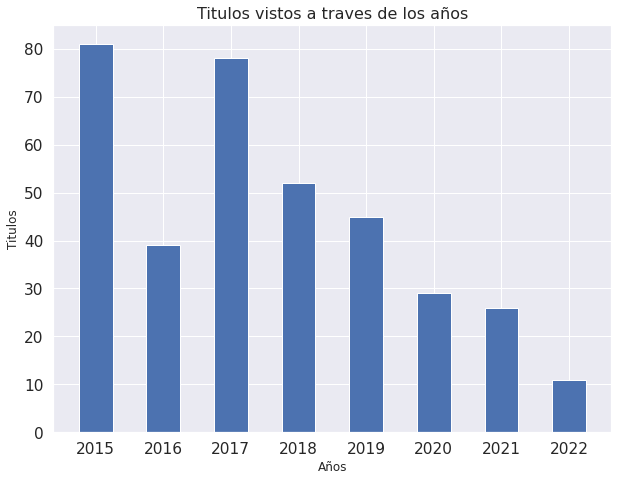

In [ ]:
fig = plt.figure(figsize = (10, 7.5))
plt.bar(años_titulos.keys(), años_titulos.values(), width = 0.5)

plt.xlabel("Años", fontSize = 12)
plt.ylabel("Titulos", fontSize = 12)

plt.title("Titulos vistos a traves de los años", fontSize = 16)
plt.show()

#### Total de días de todos los títulos reproducidos.

In [ ]:
total_dias = int(df["Duration"].sum() / 60 / 60 / 24)
print("El total de días de todos los títulos reproducidos es " + str(total_dias))

El total de días de todos los títulos reproducidos es 99


#### Bonus

##### Identificar cuál fue la película de Star Wars más veces vista por duración.

In [ ]:
star_wars_df = df[df["Simple Title"] == "Star Wars"][df["Content Type"] == "Pelicula"]
star_wars_df = star_wars_df.groupby(["Title", "Duration"]).size().reset_index()

movie_names = star_wars_df["Title"].unique()

movie_duration = {}

max_duration = 0
res = ""

for m in movie_names:
  total_duration = star_wars_df.loc[star_wars_df["Title"] == m, "Duration"].sum()
  
  if(total_duration > max_duration):
    max_duration = total_duration
    res = m

print("Pelicula más vista: " + res + ". Su tiempo de reproducción fue de " + str(int(max_duration / 60 / 60)) + " horas")

Pelicula más vista: Star Wars: El Imperio contraataca. Su tiempo de reproducción fue de 8 horas


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


##### Utilizando la API de IMDb (u otra):
 - Mostrar el póster de las películas más vistas, y de las series.
 - Encontrar el género de series y el de películas más ocurrente.


Instalar la API de IMDb

In [ ]:
!pip install IMDbPY

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 301 kB 5.1 MB/s 


Importar las librerias

In [ ]:
import imdb 
from PIL import Image
from urllib.request import urlopen

Sacar el poster de la película según su nombre

In [ ]:
ia = imdb.IMDb() 
name = peli_mas_ocurrida["Title"].unique()[0]

search = ia.search_movie(name) 

# loop for printing the name and id

cover = (search[0].data['cover url'])
print(cover)

https://m.media-amazon.com/images/M/MV5BOTgwMzFiMWYtZDhlNS00ODNkLWJiODAtZDVhNzgyNzJhYjQ4L2ltYWdlXkEyXkFqcGdeQXVyNzEzOTYxNTQ@._V1_UX32_CR0,0,32,44_AL_.jpg


Mostrar el poster de la película más vista

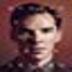

In [ ]:
img = Image.open(urlopen(cover))
size= 72,72
img = img.resize(size)
display(img)

Género de la película más vista

In [ ]:
for i in range(len(search)):
      
    # getting the id
    id = search[0].movieID
    id_peli = ia.get_movie(id)

genre = id_peli.data['genres']
print(genre)

['Biography', 'Drama', 'Thriller', 'War']


Serie más vista

In [ ]:
name_serie = list(peli_ocurrencia.keys())[0]
print(name_serie)
search_serie = ia.search_movie(name_serie) 
print(search_serie)

cover_serie = (search_serie[0].data['cover url'])
print(cover_serie)

Community
[<Movie id:1439629[http] title:_"Community" (2009)_>, <Movie id:2087720[http] title:_Community (2012)_>, <Movie id:0154206[http] title:_Bara-Dari (1955)_>, <Movie id:12434942[http] title:_Community Table Read (2020) (V)_>, <Movie id:0101158[http] title:_"Nurses" (1991)_>, <Movie id:0059431[http] title:_Marriage on the Rocks (1965)_>, <Movie id:3152622[http] title:_"Community College Chronicles" (2009) (mini)_>, <Movie id:17522580[http] title:_"Community: Webisodes" (2009)_>, <Movie id:0097100[http] title:_Communion (1989)_>, <Movie id:5531006[http] title:_Community (None)_>, <Movie id:8355268[http] title:_"The Community" (2017)_>, <Movie id:4565632[http] title:_Community (II) (2015)_>, <Movie id:6966160[http] title:_"Jim Shockey's Uncharted" Community (2017)_>, <Movie id:5907110[http] title:_"Your World" Community (1963)_>, <Movie id:15451308[http] title:_"Sisimpur" Community (2008)_>, <Movie id:0836882[http] title:_"Close to Home" Community (2006)_>, <Movie id:7130540[http] 

Mostrar el poster de la serie más vista

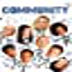

In [ ]:
img_serie = Image.open(urlopen(cover_serie))
size = 72, 72
img_serie = img_serie.resize(size)
display(img_serie)

Género de la serie más vista

In [ ]:
for i in range(len(search_serie)):
      
    # getting the id
    id_serie = search_serie[0].movieID
    id_serie_ = ia.get_movie(id_serie)

genre_serie = id_serie_.data['genres']
print(genre_serie)

['Comedy']


## Mostrando el dataframe

In [ ]:
original_df = pd.read_csv("NetflixHistory.csv")

In [ ]:
df

,Unnamed: 0,Start Time,Duration,Title,Device Type,Bookmark,Latest Bookmark,Content Type,Simple Title,Year,Month,Day,Hour
0,0,2022-08-21 19:54:53,174,Community: Temporada 3: Teoría del caos correc...,Apple Apple TV 4 Apple TV,00:02:55,00:02:55,Serie,Community,2022,August,Sunday,19
1,1,2022-08-21 19:33:17,1293,Community: Temporada 3: Ecología competitiva (...,Apple Apple TV 4 Apple TV,00:21:33,00:21:33,Serie,Community,2022,August,Sunday,19
2,2,2022-08-21 19:11:40,1288,Community: Temporada 3: Geografía del conflict...,Apple Apple TV 4 Apple TV,00:21:28,00:21:28,Serie,Community,2022,August,Sunday,19
3,3,2022-08-21 18:50:27,1241,Community: Temporada 2: Intermediate Documenta...,Apple Apple TV 4 Apple TV,00:21:02,00:21:02,Serie,Community,2022,August,Sunday,18
4,4,2022-08-21 18:16:34,1280,Community: Temporada 3: El documental (Capítul...,Apple Apple TV 4 Apple TV,00:21:21,00:21:21,Serie,Community,2022,August,Sunday,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12992,12992,2015-01-08 19:21:21,249,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),Apple TV 3 (revised),00:04:40,Not latest view,Serie,Lost,2015,January,Thursday,19
12993,12993,2015-01-08 19:20:47,15,Lost: Temporada 1: Nacida para correr (Capítul...,Apple TV 3 (revised),00:00:14,Not latest view,Serie,Lost,2015,January,Thursday,19
12994,12994,2015-01-08 19:18:32,37,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),Apple TV 3 (revised),00:00:37,Not latest view,Serie,Lost,2015,January,Thursday,19
12995,12995,2015-01-08 19:16:45,18,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),Apple TV 3 (revised),00:00:18,Not latest view,Serie,Lost,2015,January,Thursday,19
